### Predict a student's marks based on the number of hours they study using Linear Regression

##  Importing Libraries

In [22]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading and Exploring the Dataset

In [23]:
df= pd.read_csv("student_marks.csv")

In [24]:
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [25]:
df.shape

(200, 2)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [27]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


##  Visualizing Data

Text(0.5, 1.0, 'Scatter Plot of Students Study Hours vs Students marks')

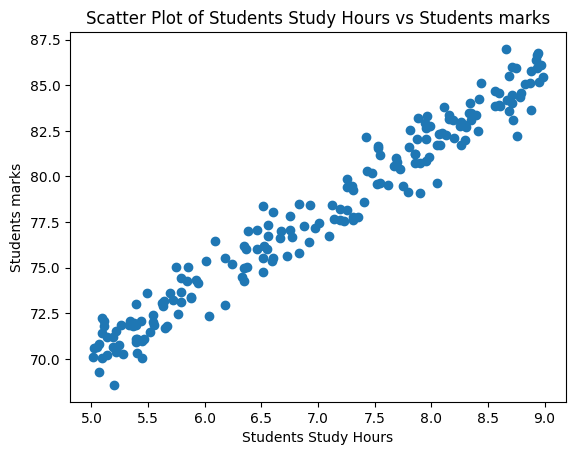

In [28]:
plt.scatter(df.study_hours, df.student_marks)
plt.xlabel("Students Study Hours")
plt.ylabel("Students marks")
plt.title("Scatter Plot of Students Study Hours vs Students marks")

## Data Cleaning

In [29]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [30]:
df.study_hours.mean()

6.9959487179487185

In [31]:
df2 = df.fillna(df.study_hours.mean())

In [33]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [36]:
X=df2.drop("student_marks", axis = "columns")
y = df2.student_marks

## Splitting the Data

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=2)

In [38]:
X_train

,study_hours
137,5.14
163,6.75
111,6.37
123,7.62
109,5.02
...,...
43,8.30
22,5.05
72,6.35
15,6.55


In [39]:
y_train

137    71.22
163    77.07
111    75.04
123    79.53
109    70.58
       ...  
43     82.84
22     70.67
72     74.97
15     76.03
168    82.68
Name: student_marks, Length: 160, dtype: float64

In [40]:
X_test

,study_hours
112,6.920000
29,7.480000
182,8.660000
199,8.350000
193,7.550000
85,5.630000
10,6.590000
54,8.760000
115,5.790000
35,7.100000


In [41]:
y_test

112    76.38
29     80.17
182    86.99
199    83.50
193    79.64
85     72.87
10     75.37
54     82.21
115    74.44
35     76.76
12     79.50
92     72.08
13     80.76
126    76.02
174    73.02
2      78.68
44     82.38
3      71.82
113    80.86
14     83.08
23     75.02
25     83.33
6      76.99
134    78.39
165    71.94
173    70.40
45     72.96
65     70.06
48     72.38
122    76.83
178    84.24
64     85.78
9      77.82
57     86.65
78     70.05
71     71.79
128    77.01
176    85.96
131    71.86
53     71.45
Name: student_marks, dtype: float64

## Training the Model

In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [43]:
lr.coef_

array([3.89080275])

In [44]:
lr.intercept_

50.68887428501462

## Making Predictions

In [45]:
lr.predict([[40]])

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([206.32098427])

In [46]:
y_pred  = lr.predict(X_test)
y_pred

array([77.61322931, 79.79207885, 84.3832261 , 83.17707724, 80.06443504,
       72.59409376, 76.3292644 , 84.77230637, 73.2166222 , 78.31357381,
       80.84259559, 71.85484124, 81.42621601, 75.82346005, 71.6603011 ,
       77.90873079, 82.16546853, 72.74972587, 81.62075614, 82.5545488 ,
       73.45007037, 81.65966417, 76.64052862, 76.01800018, 71.62139308,
       70.99886464, 74.73403528, 71.89374927, 72.24392152, 77.90873079,
       83.44943344, 85.2392027 , 76.95179284, 85.43374284, 70.49306028,
       70.57087634, 75.51219583, 85.43374284, 71.15449675, 72.16610546])

In [47]:
temp = np.c_[X_test, y_test, y_pred]
temp


array([[ 6.92      , 76.38      , 77.61322931],
       [ 7.48      , 80.17      , 79.79207885],
       [ 8.66      , 86.99      , 84.3832261 ],
       [ 8.35      , 83.5       , 83.17707724],
       [ 7.55      , 79.64      , 80.06443504],
       [ 5.63      , 72.87      , 72.59409376],
       [ 6.59      , 75.37      , 76.3292644 ],
       [ 8.76      , 82.21      , 84.77230637],
       [ 5.79      , 74.44      , 73.2166222 ],
       [ 7.1       , 76.76      , 78.31357381],
       [ 7.75      , 79.5       , 80.84259559],
       [ 5.44      , 72.08      , 71.85484124],
       [ 7.9       , 80.76      , 81.42621601],
       [ 6.46      , 76.02      , 75.82346005],
       [ 5.39      , 73.02      , 71.6603011 ],
       [ 6.99594872, 78.68      , 77.90873079],
       [ 8.09      , 82.38      , 82.16546853],
       [ 5.67      , 71.82      , 72.74972587],
       [ 7.95      , 80.86      , 81.62075614],
       [ 8.19      , 83.08      , 82.5545488 ],
       [ 5.85      , 75.02      , 73.450

## Results and Error Analysis

In [48]:
result = pd.DataFrame(data = np.c_[X_test, y_test, y_pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])
result

,study_hours,student_marks_original,student_marks_predicted
0,6.920000,76.38,77.613229
1,7.480000,80.17,79.792079
2,8.660000,86.99,84.383226
3,8.350000,83.50,83.177077
4,7.550000,79.64,80.064435
5,5.630000,72.87,72.594094
6,6.590000,75.37,76.329264
7,8.760000,82.21,84.772306
8,5.790000,74.44,73.216622
9,7.100000,76.76,78.313574


## Calculating Error

In [49]:
result['Error'] = result['student_marks_original'] - result['student_marks_predicted']
result['SE'] = result['Error'] * result['Error']
result

,study_hours,student_marks_original,student_marks_predicted,Error,SE
0,6.920000,76.38,77.613229,-1.233229,1.520855
1,7.480000,80.17,79.792079,0.377921,0.142824
2,8.660000,86.99,84.383226,2.606774,6.795270
3,8.350000,83.50,83.177077,0.322923,0.104279
4,7.550000,79.64,80.064435,-0.424435,0.180145
5,5.630000,72.87,72.594094,0.275906,0.076124
6,6.590000,75.37,76.329264,-0.959264,0.920188
7,8.760000,82.21,84.772306,-2.562306,6.565414
8,5.790000,74.44,73.216622,1.223378,1.496653
9,7.100000,76.76,78.313574,-1.553574,2.413592


In [50]:
SSR = result['SE'].sum() # SSR-sum of square residuals
SSR

54.279347272012174

In [53]:
MY = result['student_marks_original'].mean()
MY

77.436

In [57]:
result['Y-MY']=result['student_marks_original']-MY
result

,study_hours,student_marks_original,student_marks_predicted,Error,SE,Y-MY
0,6.920000,76.38,77.613229,-1.233229,1.520855,-1.056
1,7.480000,80.17,79.792079,0.377921,0.142824,2.734
2,8.660000,86.99,84.383226,2.606774,6.795270,9.554
3,8.350000,83.50,83.177077,0.322923,0.104279,6.064
4,7.550000,79.64,80.064435,-0.424435,0.180145,2.204
5,5.630000,72.87,72.594094,0.275906,0.076124,-4.566
6,6.590000,75.37,76.329264,-0.959264,0.920188,-2.066
7,8.760000,82.21,84.772306,-2.562306,6.565414,4.774
8,5.790000,74.44,73.216622,1.223378,1.496653,-2.996
9,7.100000,76.76,78.313574,-1.553574,2.413592,-0.676


In [58]:
result['Y-MY-SQ']=result['Y-MY']*result['Y-MY']
result

,study_hours,student_marks_original,student_marks_predicted,Error,SE,Y-MY,Y-MY-SQ
0,6.920000,76.38,77.613229,-1.233229,1.520855,-1.056,1.115136
1,7.480000,80.17,79.792079,0.377921,0.142824,2.734,7.474756
2,8.660000,86.99,84.383226,2.606774,6.795270,9.554,91.278916
3,8.350000,83.50,83.177077,0.322923,0.104279,6.064,36.772096
4,7.550000,79.64,80.064435,-0.424435,0.180145,2.204,4.857616
5,5.630000,72.87,72.594094,0.275906,0.076124,-4.566,20.848356
6,6.590000,75.37,76.329264,-0.959264,0.920188,-2.066,4.268356
7,8.760000,82.21,84.772306,-2.562306,6.565414,4.774,22.791076
8,5.790000,74.44,73.216622,1.223378,1.496653,-2.996,8.976016
9,7.100000,76.76,78.313574,-1.553574,2.413592,-0.676,0.456976


In [60]:
SST = result['Y-MY-SQ'].sum()
SST

1014.3731599999999

In [61]:
R_squared = 1 - SSR/SST
R_squared

0.9464897639129054

In [66]:
Acuracy = 1 - MAPE
Acuracy

0.9875088430293683

In [62]:
result['AE'] = abs(result['Error'])
result['APE'] = result['AE']/result['student_marks_original'] 
result

,study_hours,student_marks_original,student_marks_predicted,Error,SE,Y-MY,Y-MY-SQ,AE,APE
0,6.920000,76.38,77.613229,-1.233229,1.520855,-1.056,1.115136,1.233229,0.016146
1,7.480000,80.17,79.792079,0.377921,0.142824,2.734,7.474756,0.377921,0.004714
2,8.660000,86.99,84.383226,2.606774,6.795270,9.554,91.278916,2.606774,0.029966
3,8.350000,83.50,83.177077,0.322923,0.104279,6.064,36.772096,0.322923,0.003867
4,7.550000,79.64,80.064435,-0.424435,0.180145,2.204,4.857616,0.424435,0.005329
5,5.630000,72.87,72.594094,0.275906,0.076124,-4.566,20.848356,0.275906,0.003786
6,6.590000,75.37,76.329264,-0.959264,0.920188,-2.066,4.268356,0.959264,0.012727
7,8.760000,82.21,84.772306,-2.562306,6.565414,4.774,22.791076,2.562306,0.031168
8,5.790000,74.44,73.216622,1.223378,1.496653,-2.996,8.976016,1.223378,0.016434
9,7.100000,76.76,78.313574,-1.553574,2.413592,-0.676,0.456976,1.553574,0.020239


In [64]:
MAPE = result['APE'].mean()
MAPE

0.01249115697063177

In [65]:
Acuracy = 1 - MAPE
Acuracy

0.9875088430293683